In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures
from yellowbrick.model_selection import LearningCurve

In [2]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

## Совместная часть

In [2]:
X, y = make_classification(n_samples=10000, n_features=500, 
                           n_informative=50, n_repeated=0, 
                           class_sep=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=3)

In [3]:
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8415
Test score: 0.8056


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


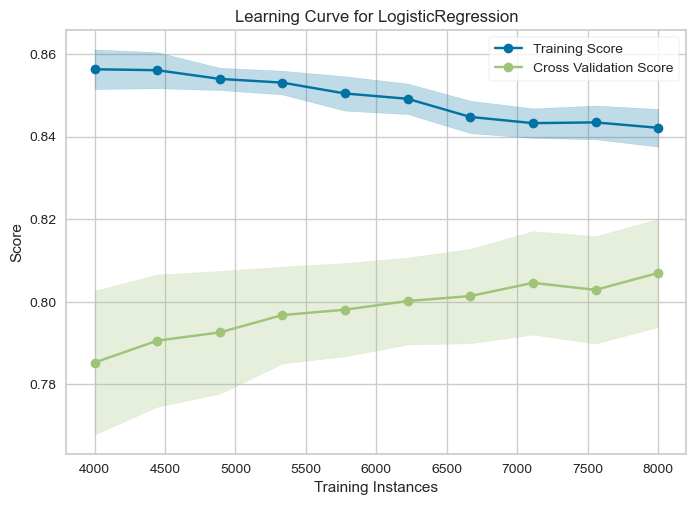

In [4]:
visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show() 

In [5]:
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.7724
Test score: 0.7712


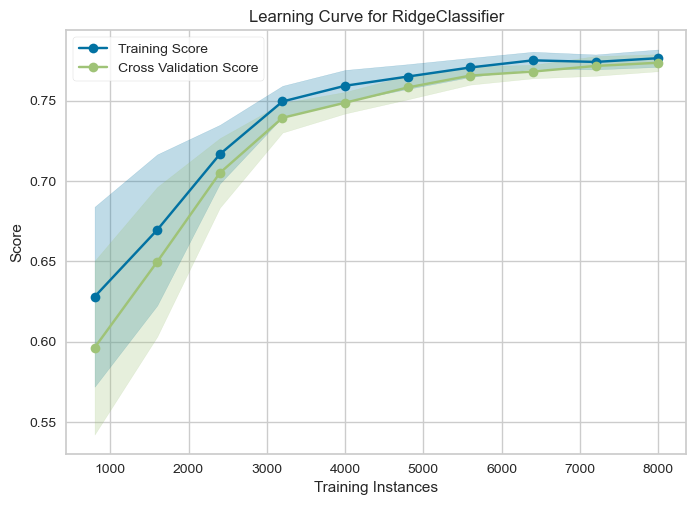

In [6]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

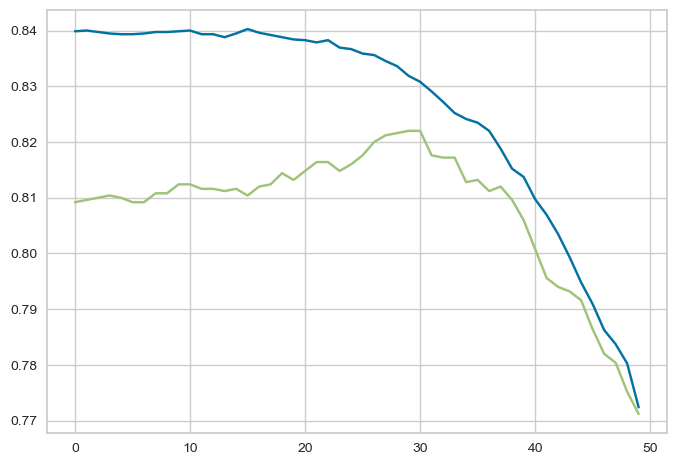

In [7]:
trains = []
tests = []
for i in np.logspace(2, 6, 50):
    ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
    trains.append(ridge.score(X_train, y_train))
    tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests);

In [8]:
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8311
Test score: 0.8228


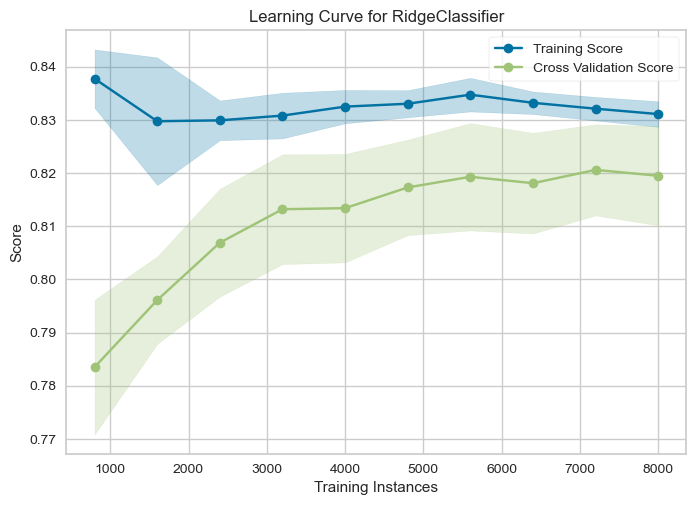

In [9]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=26500), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y).show()

In [10]:
dataset = np.genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

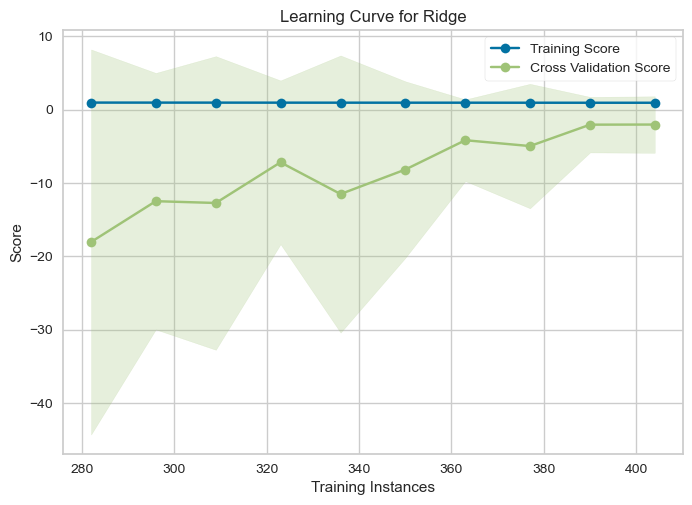

In [11]:
visualizer = LearningCurve(
    Ridge(alpha=0.0001), scoring='r2', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y) .show() 

In [12]:
lr = Ridge(alpha=0.18).fit(X_train, y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.92
Linear Regression-Test set score: 0.77


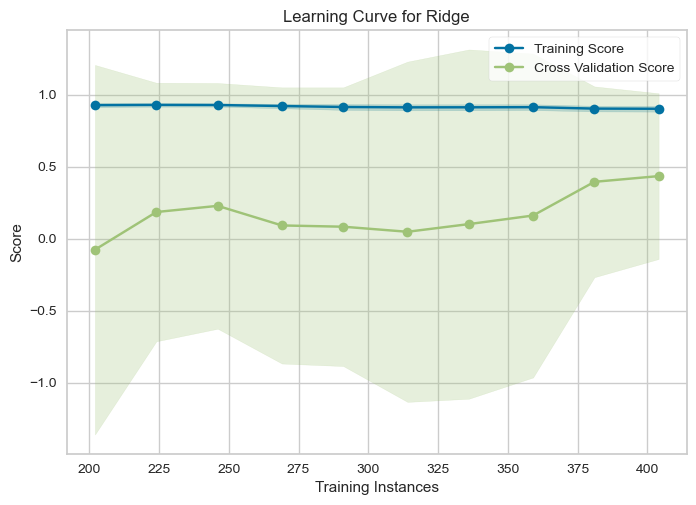

In [13]:
visualizer = LearningCurve(
    Ridge(alpha=0.18), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show() 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.440e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.449e+02, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.459e+02, toleranc

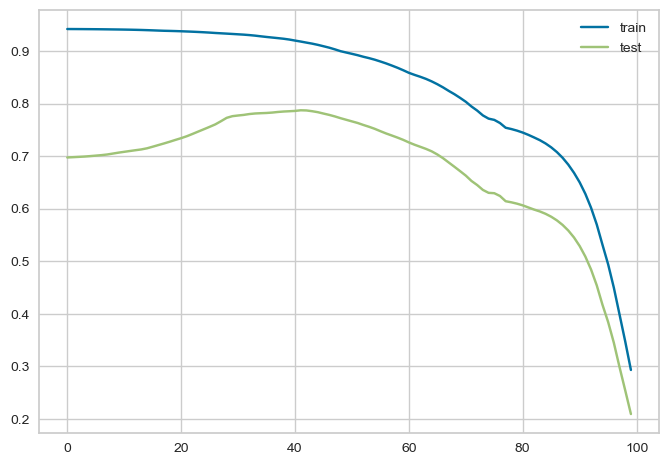

In [14]:
trains = []
tests = []
for i in np.logspace(-4, 0, 100):
    ridge = Lasso(alpha=i).fit(X_train, y_train)
    trains.append(ridge.score(X_train, y_train))
    tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML4.3%20diagnostics/diabetes.csv',nrows=200)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.5500


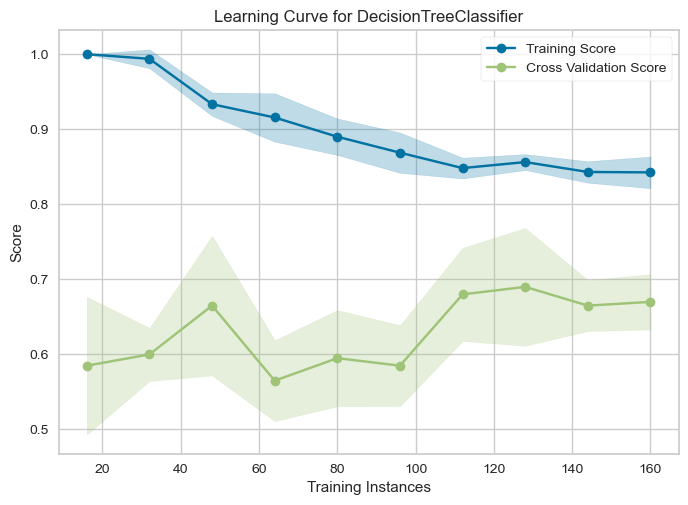

In [18]:
visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth=4), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show() 

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML4.3%20diagnostics/diabetes.csv')
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.7273


In [20]:
data = fetch_openml(name='delta_ailerons')
data.data.shape

(7129, 5)

In [21]:
X = pd.get_dummies(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.6058
Test score = 0.5940


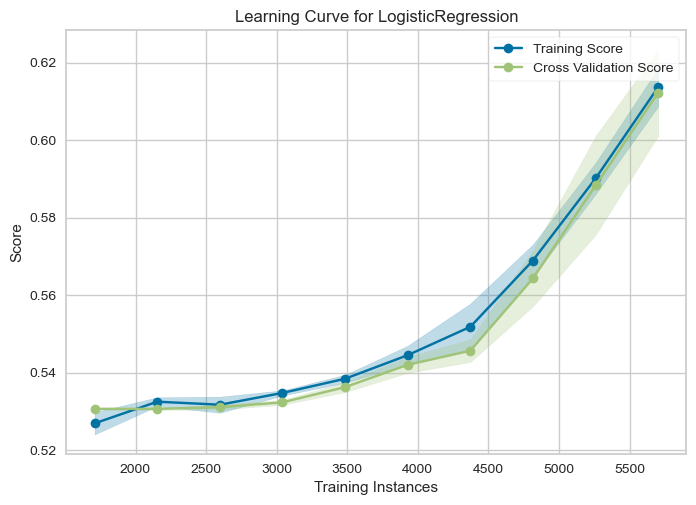

In [23]:
visualizer = LearningCurve(
    LogisticRegression(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y).show() 

In [24]:
model = MLPClassifier().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9383
Test score = 0.9383


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
model = RidgeClassifier(alpha=0.001).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(2).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(2).fit_transform(X_test))
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))

Train score = 0.9392


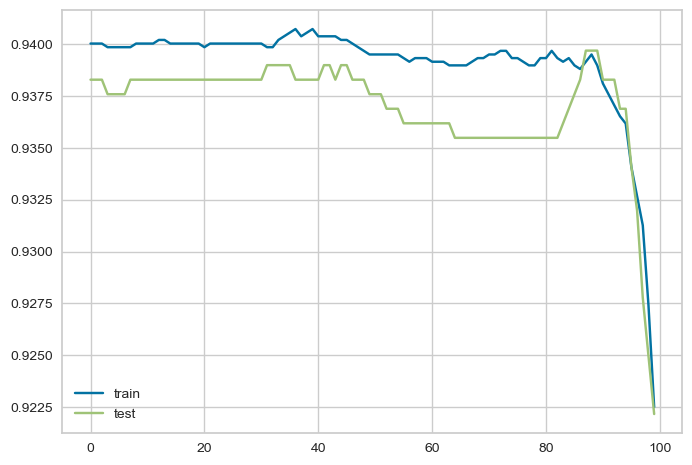

In [27]:
trains = []
tests = []
for i in np.logspace(-7, 0, 100):
    ridge = RidgeClassifier(alpha=i).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
    trains.append(ridge.score(PolynomialFeatures(2).fit_transform(X_train), y_train))
    tests.append(ridge.score(PolynomialFeatures(2).fit_transform(X_test), y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

## Сам. работа

In [80]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML4.3%20diagnostics/diabetes.csv')

target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Повторите диагностику модели классификации синтетических данных с использованием других метрик эффективности - precision, recall, F1. Как изменились результаты?

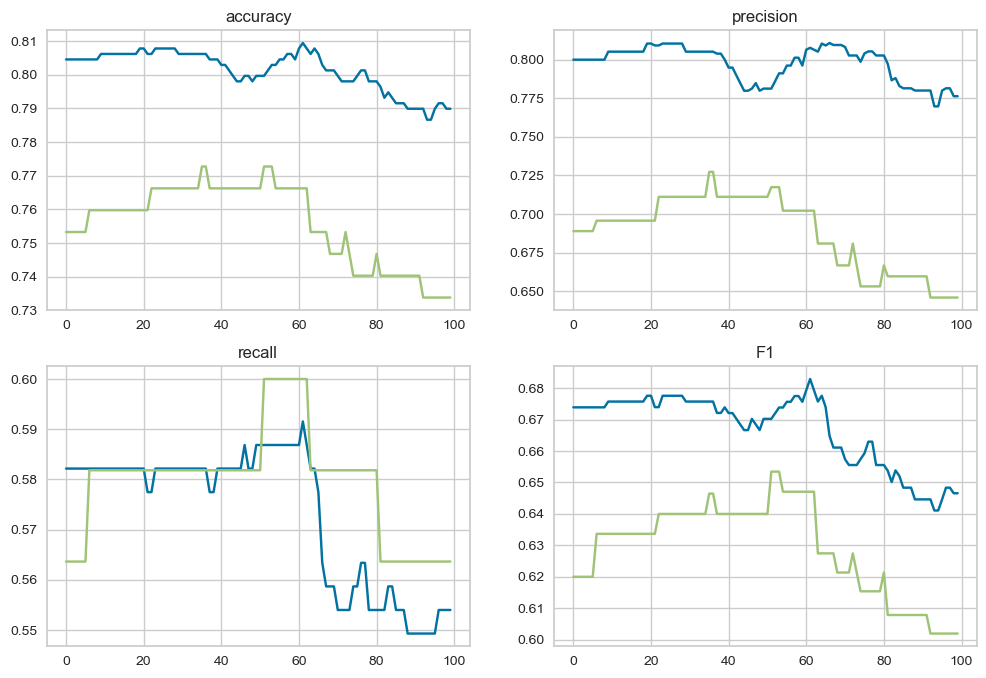

In [90]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

data = {'accuracy': {'train': [], 'test': [], 'method': accuracy_score},
        'precision': {'train': [], 'test': [], 'method': precision_score},
        'recall': {'train': [], 'test': [], 'method': recall_score},
        'F1': {'train': [], 'test': [], 'method': f1_score}}


for i in np.logspace(-2, 6, 100):
    ridge = RidgeClassifier(alpha=i).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
    
    y_train_pred = ridge.predict(PolynomialFeatures(2).fit_transform(X_train))
    y_test_pred = ridge.predict(PolynomialFeatures(2).fit_transform(X_test))                                  
    
    for metric in data.keys():
        data[metric]['train'].append(data[metric]['method'](y_train, y_train_pred))
        data[metric]['test'].append(data[metric]['method'](y_test, y_test_pred))
        
        
for title, axis in zip(data.keys(), ax.flatten()):
    axis.plot(data[title]['train'])
    axis.plot(data[title]['test'])
    axis.title.set_text(title)

In [68]:
# Все метрики кроме recall обладают схожими паттернами

### 2. Повторите диагностику модели регрессии с использованием других видов моделей

#### a) Метода опорных векторов (исследуйте влияние параметра С на недо-и переобучение)

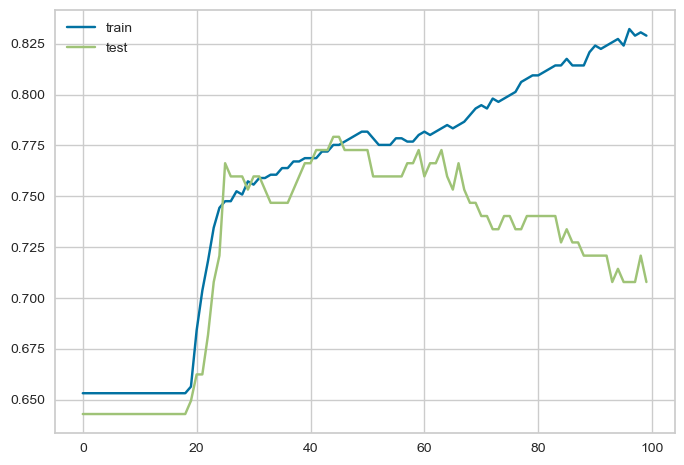

In [117]:
trains = []
tests = []

for i in np.logspace(-2, 3, 100):
    regr = SVC(C=i).fit(X_train, y_train)
    trains.append(regr.score(X_train, y_train))
    tests.append(regr.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

In [100]:
# Можем видеть, что при маленьких C модель сильно недообучается
# А при больших C сильно переобучается

In [118]:
max(zip(tests, np.logspace(-2, 3, 100)), key=lambda x: x[0])

(0.7792207792207793, 1.6681005372000592)

In [120]:
# Оптимальный результат при C = 1.6681

regr = SVC(C=1.6681).fit(X_train, y_train)
print(f'Train score: {regr.score(X_train, y_train)}')
print(f'Test score: {regr.score(X_test, y_test)}')

Train score: 0.7752442996742671
Test score: 0.7792207792207793


#### b) Метода ближайших соседей (исследуйте влияние количества соседей)

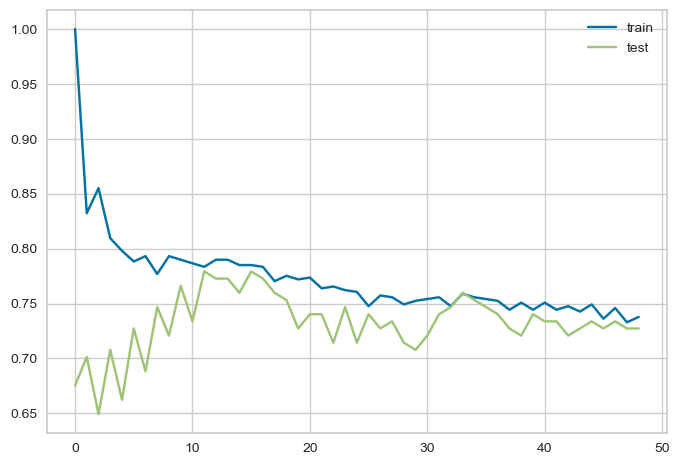

In [127]:
trains = []
tests = []

for i in np.arange(1, 50):
    regr = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    trains.append(regr.score(X_train, y_train))
    tests.append(regr.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

In [105]:
# Можем видеть, что при маленьких n_neighbors модель сильно переобучается
# А при больших n_neighbors немного недообчуется

In [128]:
max(zip(tests, np.arange(1, 50)), key=lambda x: x[0])

(0.7792207792207793, 12)

In [129]:
# Оптимальный результат при n_neighbors = 12

regr = KNeighborsClassifier(n_neighbors=12).fit(X_train, y_train)
print(f'Train score: {regr.score(X_train, y_train)}')
print(f'Test score: {regr.score(X_test, y_test)}')

Train score: 0.7833876221498371
Test score: 0.7792207792207793


#### c) Метода решающих деревьев (гиперпараметры по вашему выбору)

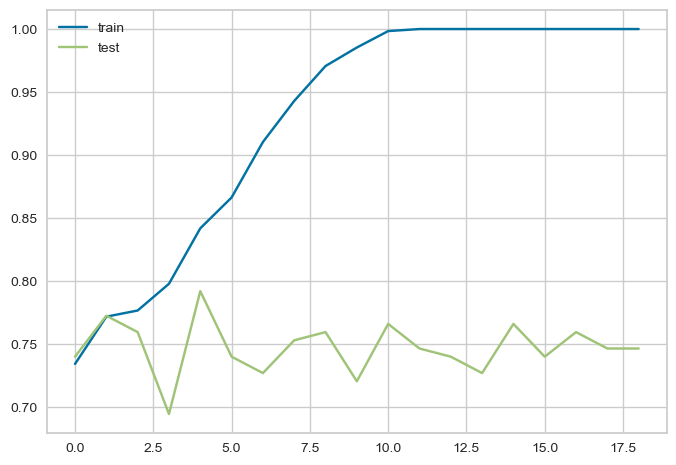

In [130]:
# Буду использовать глубину дерева

trains = []
tests = []

for i in np.arange(1, 20):
    regr = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    trains.append(regr.score(X_train, y_train))
    tests.append(regr.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

In [131]:
# Можем видеть, что при маленьких max_depth модель сильно недообучается
# А при больших max_depth сильно переобучается (что и свойственно для деревьев)

In [133]:
max(zip(tests, np.arange(1, 20)), key=lambda x: x[0])

(0.7922077922077922, 5)

In [134]:
# Оптимальный результат при max_depth = 5

regr = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
print(f'Train score: {regr.score(X_train, y_train)}')
print(f'Test score: {regr.score(X_test, y_test)}')

Train score: 0.8420195439739414
Test score: 0.7922077922077922


### 3. Дополните анализ датасета Бостон исследованием модели лассо - постройте кривые обучения для переобученной, недообученной и качественной модели, найдите оптимальное значение параметра регуляризации в модели лассо.

In [3]:
dataset = np.genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')

X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

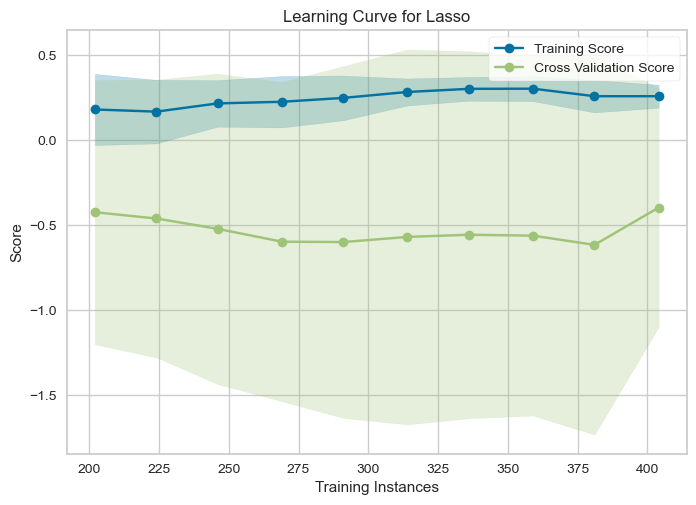

In [4]:
visualizer = LearningCurve(
    Lasso(), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show() 

In [5]:
# Модель показывает просто ужасные результаты и сильно недообучена

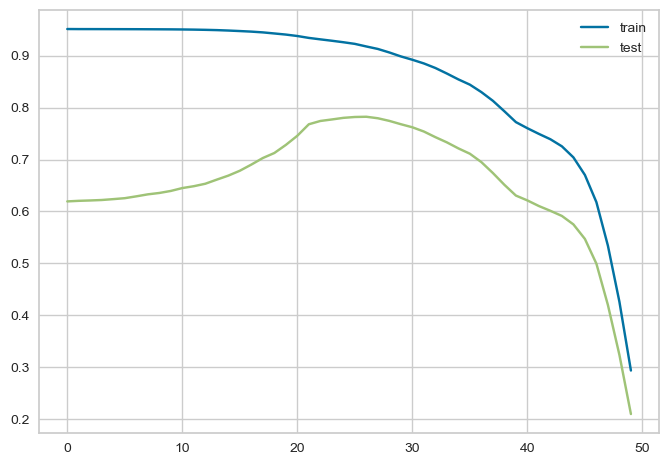

In [7]:
trains = []
tests = []

for i in np.logspace(-5, 0, 50):
    regr = Lasso(alpha=i, max_iter=10**7).fit(X_train, y_train)
    trains.append(regr.score(X_train, y_train))
    tests.append(regr.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

In [8]:
max(zip(tests,np.logspace(-5, 0, 50)), key=lambda x: x[0])

(0.7824054175376053, 0.004498432668969444)

In [9]:
# Оптимально значение регуляризации - 0.00449

regr = Lasso(alpha=0.00449, max_iter=10**7).fit(X_train, y_train)
print(f'Train score: {regr.score(X_train, y_train)}')
print(f'Test score: {regr.score(X_test, y_test)}')

Train score: 0.9179179659968822
Test score: 0.7824093394447325


### 4. В одном из двух первых примеров используйте модель ElasticNet и исследуйте влияние сразу двух параметров регуляризации на эффективность модели.

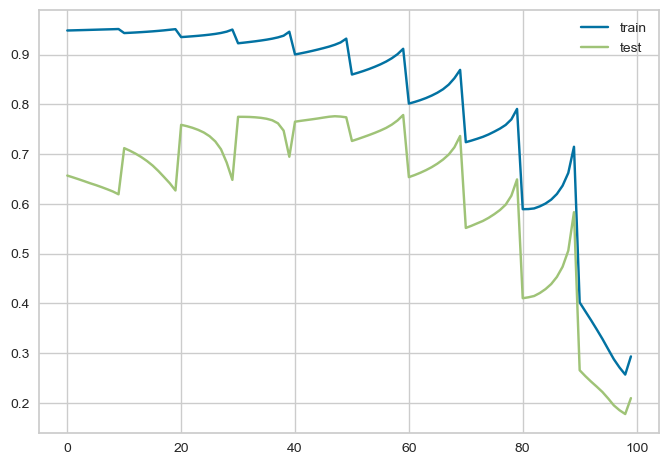

In [14]:
trains = []
tests = []
rng = []

for i in np.logspace(-5, 0, 10):
    for j in np.linspace(0.1, 1, 10):
        regr = ElasticNet(alpha=i, l1_ratio=j, max_iter=10**7).fit(X_train, y_train)
        rng.append((i, j))
        trains.append(regr.score(X_train, y_train))
        tests.append(regr.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

In [15]:
max(zip(tests, rng), key=lambda x: x[0])

(0.7786470292364472, (0.005994842503189409, 1.0))

In [16]:
# Оптимальные значения alpha = 0.00599, L1 = 1

regr = ElasticNet(alpha=0.00599, l1_ratio=1, max_iter=10**7).fit(X_train, y_train)
print(f'Train score: {regr.score(X_train, y_train)}')
print(f'Test score: {regr.score(X_test, y_test)}')

Train score: 0.911800779340059
Test score: 0.7786593099915485


### 5. Дополните анализ дерева решений из третьего примера: постройте кривые регуляризации для полного датасета, найдите оптимальную глубину дерева и оцените качество такой модели на всем датасете. Повторите данный анализ используя в качестве метрики эффективности F1.

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML4.3%20diagnostics/diabetes.csv')

target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

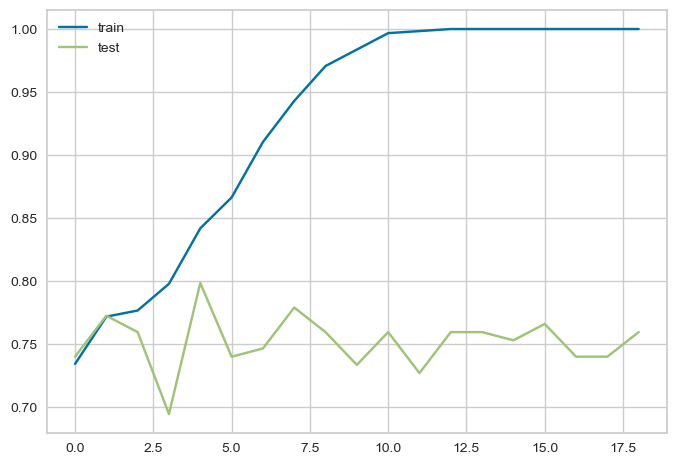

In [19]:
trains = []
tests = []

for i in np.arange(1, 20):
    regr = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    trains.append(regr.score(X_train, y_train))
    tests.append(regr.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

In [20]:
max(zip(tests, np.arange(1, 20)), key=lambda x: x[0])

(0.7987012987012987, 5)

In [21]:
# Оптимальная глубина = 5

regr = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
print(f'Train score: {regr.score(X_train, y_train)}')
print(f'Test score: {regr.score(X_test, y_test)}')

Train score: 0.8420195439739414
Test score: 0.7922077922077922


In [26]:
# С метрикой f1 score

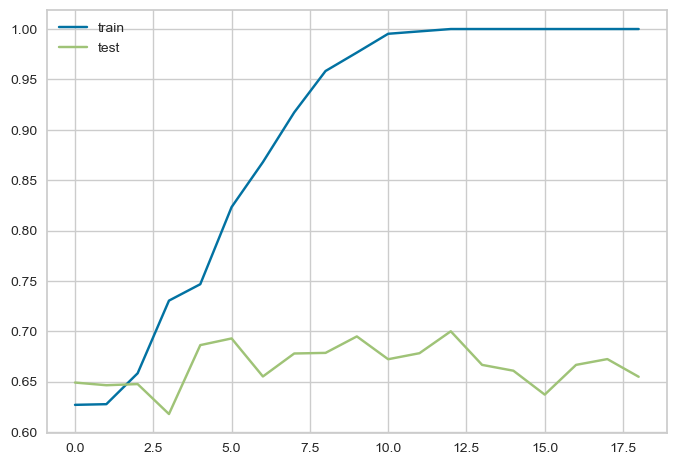

In [23]:
trains = []
tests = []

for i in np.arange(1, 20):
    model = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    trains.append(f1_score(y_train, y_train_pred))
    tests.append(f1_score(y_test, y_test_pred))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

In [24]:
max(zip(tests, np.arange(1, 20)), key=lambda x: x[0])

(0.7000000000000001, 13)

In [25]:
# Оптимальная глубина = 13

model = DecisionTreeClassifier(max_depth=13).fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
    
print(f'Train f1 score: {f1_score(y_train, y_train_pred)}')
print(f'Test f1 score: {f1_score(y_test, y_test_pred)}')

Train f1 score: 1.0
Test f1 score: 0.6722689075630253


### 6. Повторите анализ на других реальных датасетах из репозитория OpenML

#### Я выбрал датасет nursery

In [27]:
data = fetch_openml(name='nursery')
data.data.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\_openml.py:417: UserWarning: Multiple active versions of the dataset matching the name nursery exist. Versions may be fundamentally different, returning version 1.
  warn(


(12960, 8)

In [28]:
data.data

,parents,has_nurs,form,children,housing,finance,social,health
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended
1,usual,proper,complete,1,convenient,convenient,nonprob,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority
...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority


In [29]:
# Попробуем предсказывать здоровье health

In [36]:
y = data.data['health']
X = pd.get_dummies(data.data.drop('health', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

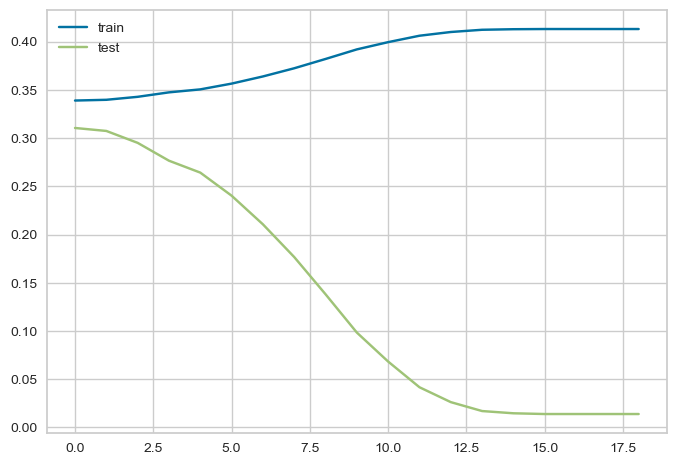

In [56]:
trains = []
tests = []

for i in np.arange(1, 20):
    model = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    
    trains.append(model.score(X_train, y_train))
    tests.append(model.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend();

In [57]:
# В целом получается не очень качественная модель, но попробуем ее оптимизировать, насколько это возможно

In [58]:
max(zip(tests, np.arange(1, 20)), key=lambda x: x[0])

(0.310570987654321, 1)

In [59]:
# Оптимальная глубина = 1

model = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)

    
print(f'Train score: {model.score(X_train, y_train)}')
print(f'Test score: {model.score(X_test, y_test)}')

Train score: 0.33902391975308643
Test score: 0.310570987654321
